Step 1 - find a way to take system audio as microphone input.

In [10]:
import pyaudio
import wave
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib import animation
pyaudio.PyAudio?
%matplotlib nbagg

In [2]:
p = pyaudio.PyAudio()

In [3]:
host = p.get_default_output_device_info()["hostApi"]
name = p.get_default_output_device_info()["name"]
rate = p.get_default_output_device_info()["defaultSampleRate"]
p.get_device_info_by_index(2)

{'index': 2,
 'structVersion': 2,
 'name': 'CABLE Output (VB-Audio Virtual ',
 'hostApi': 0,
 'maxInputChannels': 8,
 'maxOutputChannels': 0,
 'defaultLowInputLatency': 0.09,
 'defaultLowOutputLatency': 0.09,
 'defaultHighInputLatency': 0.18,
 'defaultHighOutputLatency': 0.18,
 'defaultSampleRate': 44100.0}

In [4]:
stream = p.open(rate = 44100,
                channels = 2, format = pyaudio.paInt16,
                input_device_index = 2,
                input = True )

In [5]:
testArray = []
for _ in range(0,int(44100/1024 * 5)):
    data = stream.read(1024)
    testArray.append(np.fromstring(data,dtype = np.int16))
dayta = np.hstack(testArray)
stream.stop_stream()
stream.close()


C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


In [6]:
stupid = wave.open("test.wav","wb")
stupid.setnchannels(2)
stupid.setsampwidth(p.get_sample_size(pyaudio.paInt16))
stupid.setframerate(44100)
stupid.writeframes(dayta)
stupid.close()

Step 2 - Get an oscilliscope working for one wav file, including an animation of the waveform from the file.

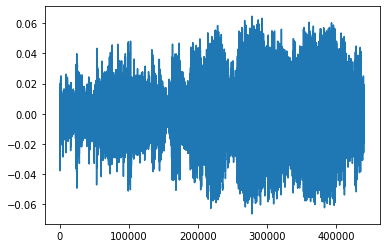

In [7]:
plt.plot(dayta/32767)
plt.show()


<IPython.core.display.Javascript object>


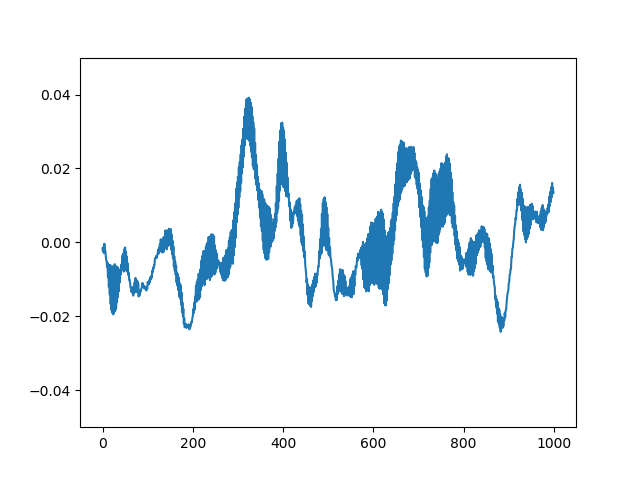

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(-0.05,0.05)
Ln, = ax.plot(dayta[0:1000]/32767)
plt.ion()
plt.show()
for i in range(1,200):
    
    Ln.set_ydata(dayta[1000*i:1000*(i+1)]/32767)
    Ln.set_xdata(range(len(dayta[1000*i:1000*(i+1)])))
    fig.canvas.draw()
    plt.pause(0.05)
plt.show()
    
    


Step 3 - Make a frequency display based on the wav file

In [12]:
import scipy.io.wavfile as wav
import scipy.signal as sig

In [24]:
fs, x = wav.read("test.wav")
NPERSEG = 1024*32 
xLeft = x[:,0]
xRight = x[:,1]
fLeft,tLeft,SxxLeft = sig.spectrogram(xLeft,fs=fs,window = "hann",nperseg = NPERSEG)
fRight,tRight,SxxRight = sig.spectrogram(xRight,fs = fs,window = "hann",nperseg = NPERSEG)